<a href="https://colab.research.google.com/github/ujjawalsingh10/Bank-Fraud-detection-/blob/main/Bank%20Fraud%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [126]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [127]:
path = "/content/drive/MyDrive/INSAID Dataset/Fraud.csv"
df = pd.read_csv(path)

In [128]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [129]:
df.shape

(6362620, 11)

In [130]:
df.sample(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
4023271,299,PAYMENT,28047.77,C397641691,323507.65,295459.88,M2000267771,0.00,0.00,0,0
3172424,238,PAYMENT,5709.88,C521901762,12651.26,6941.39,M2066833466,0.00,0.00,0,0
1280400,135,TRANSFER,563806.15,C325210427,217287.00,0.00,C1735641121,0.00,563806.15,0,0
5701109,398,TRANSFER,308174.96,C61848306,93457.20,0.00,C661343866,1631294.38,1939469.34,0,0
5901468,403,PAYMENT,5489.23,C347930754,62244.00,56754.77,M1132434359,0.00,0.00,0,0
814859,40,CASH_OUT,330273.44,C2098788974,0.00,0.00,C474364517,395569.91,725843.35,0,0
1165804,132,TRANSFER,682278.69,C471905202,0.00,0.00,C1830915772,721117.75,1403396.43,0,0
2835274,226,CASH_OUT,199196.43,C1094747489,5945.00,0.00,C824285986,1039565.59,1238762.01,0,0
1884196,164,TRANSFER,767757.83,C142904552,76915.00,0.00,C1118400176,3425650.94,4193408.77,0,0
42107,9,CASH_OUT,59811.42,C123085367,129900.00,70088.58,C1782113663,7651171.40,7662734.75,0,0


In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [132]:
#Check the fraud count
df['isFraud'].value_counts() 

0    6354407
1       8213
Name: isFraud, dtype: int64

In [133]:
#The isFlagged count
df['isFlaggedFraud'].value_counts()

0    6362604
1         16
Name: isFlaggedFraud, dtype: int64

In [134]:
#Some info about type of transanctions
df['type'].value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

In [135]:
#counting the total no. of different steps 
df['step'].value_counts().nunique()

428

In [136]:
#10 most common transanction amounts
df['amount'].value_counts().head(10)

10000000.0    3207
10000.0         88
5000.0          79
15000.0         68
500.0           65
100000.0        42
21500.0         37
120000.0        29
135000.0        20
0.0             16
Name: amount, dtype: int64

In [137]:
#The types of transanctions that are fraudulent
df.loc[df.isFraud == 1].type.drop_duplicates().values


array(['TRANSFER', 'CASH_OUT'], dtype=object)

In [138]:
#Finding the transanctions which are flagged
df.loc[df.isFlaggedFraud == 1 ].type.drop_duplicates().values

array(['TRANSFER'], dtype=object)

### Data Preprocessing

In [139]:
Xdf = df.loc[(df.type == 'TRANSFER') | (df.type == 'CASH_OUT')]
Xdf.shape

(2770409, 11)

In [140]:
Xdf['isFraud'].value_counts()

0    2762196
1       8213
Name: isFraud, dtype: int64

In [141]:
# To calc the error from old and new balances
Xdf['errorbalanceOrig'] = Xdf.newbalanceOrig  + Xdf.amount - Xdf.oldbalanceOrg 
Xdf['errorbalanceDest'] = Xdf.oldbalanceDest + Xdf.amount - Xdf.newbalanceDest

<ipython-input-141-b50c29ee2e1f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Xdf['errorbalanceOrig'] = Xdf.newbalanceOrig  + Xdf.amount - Xdf.oldbalanceOrg
<ipython-input-141-b50c29ee2e1f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Xdf['errorbalanceDest'] = Xdf.oldbalanceDest + Xdf.amount - Xdf.newbalanceDest


In [142]:
corr = Xdf.corr()
corr

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,errorbalanceOrig,errorbalanceDest
step,1.000000,0.037007,0.005744,-0.011280,0.037778,0.037475,0.048671,0.005015,0.033936,0.029010
amount,0.037007,1.000000,0.120389,0.018296,0.307133,0.497027,0.070660,0.012301,0.982838,-0.234198
oldbalanceOrg,0.005744,0.120389,1.000000,0.778826,-0.020403,-0.010029,0.347582,0.074300,-0.030438,0.113853
newbalanceOrig,-0.011280,0.018296,0.778826,1.000000,-0.012277,-0.015439,0.063557,0.123957,-0.032263,0.061630
oldbalanceDest,0.037778,0.307133,-0.020403,-0.012277,1.000000,0.970060,-0.014960,-0.000969,0.315245,-0.065281
newbalanceDest,0.037475,0.497027,-0.010029,-0.015439,0.970060,1.000000,-0.008978,-0.001053,0.504317,-0.230329
isFraud,0.048671,0.070660,0.347582,0.063557,-0.014960,-0.008978,1.000000,0.044072,-0.017149,0.069935
isFlaggedFraud,0.005015,0.012301,0.074300,0.123957,-0.000969,-0.001053,0.044072,1.000000,0.012562,0.019802
errorbalanceOrig,0.033936,0.982838,-0.030438,-0.032263,0.315245,0.504317,-0.017149,0.012562,1.000000,-0.259573
errorbalanceDest,0.029010,-0.234198,0.113853,0.061630,-0.065281,-0.230329,0.069935,0.019802,-0.259573,1.000000


In [143]:
Xdf.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,errorbalanceOrig,errorbalanceDest
2,1,TRANSFER,181.00,C1305486145,181.0,0.0,C553264065,0.0,0.00,1,0,0.00,181.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.0,C38997010,21182.0,0.00,1,0,0.00,21363.0
15,1,CASH_OUT,229133.94,C905080434,15325.0,0.0,C476402209,5083.0,51513.44,0,0,213808.94,182703.5
19,1,TRANSFER,215310.30,C1670993182,705.0,0.0,C1100439041,22425.0,0.00,0,0,214605.30,237735.3
24,1,TRANSFER,311685.89,C1984094095,10835.0,0.0,C932583850,6267.0,2719172.89,0,0,300850.89,-2401220.0


In [144]:
Xdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2770409 entries, 2 to 6362619
Data columns (total 13 columns):
 #   Column            Dtype  
---  ------            -----  
 0   step              int64  
 1   type              object 
 2   amount            float64
 3   nameOrig          object 
 4   oldbalanceOrg     float64
 5   newbalanceOrig    float64
 6   nameDest          object 
 7   oldbalanceDest    float64
 8   newbalanceDest    float64
 9   isFraud           int64  
 10  isFlaggedFraud    int64  
 11  errorbalanceOrig  float64
 12  errorbalanceDest  float64
dtypes: float64(7), int64(3), object(3)
memory usage: 295.9+ MB


In [145]:
X = Xdf.drop(["isFraud", "isFlaggedFraud", "nameOrig", "nameDest"], axis = 1)
y = Xdf["isFraud"].values
X.shape, y.shape

((2770409, 9), (2770409,))

In [146]:
#Lable encoding the transanction type
X['type'].replace('TRANSFER', 0, inplace = True)
X['type'].replace('CASH_OUT', 1, inplace = True)

In [147]:
X[:10]

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,errorbalanceOrig,errorbalanceDest
2,1,0,181.00,181.00,0.0,0.0,0.00,0.00,181.00
3,1,1,181.00,181.00,0.0,21182.0,0.00,0.00,21363.00
15,1,1,229133.94,15325.00,0.0,5083.0,51513.44,213808.94,182703.50
19,1,0,215310.30,705.00,0.0,22425.0,0.00,214605.30,237735.30
24,1,0,311685.89,10835.00,0.0,6267.0,2719172.89,300850.89,-2401220.00
42,1,1,110414.71,26845.41,0.0,288800.0,2415.16,83569.30,396799.55
47,1,1,56953.90,1942.02,0.0,70253.0,64106.18,55011.88,63100.72
48,1,1,5346.89,0.00,0.0,652637.0,6453430.91,5346.89,-5795447.02
51,1,1,23261.30,20411.53,0.0,25742.0,0.00,2849.77,49003.30
58,1,0,62610.80,79114.00,16503.2,517.0,8383.29,0.00,54744.51


In [148]:
# Checking if the dataset contains NULL values
X.isnull().values.any()

False

In [149]:
#Oversampling to balance the datasets for equal no of 0s and 1s for frauds
from imblearn.over_sampling import SMOTE

X_res, y_res = SMOTE().fit_resample(X, y)
X_res.shape, y_res.shape

((5524392, 9), (5524392,))

In [150]:
y_res1 = pd.DataFrame(y_res)
y_res1.value_counts()

0    2762196
1    2762196
dtype: int64

###Model 

In [151]:
import torch 
from torch import nn

In [166]:
X_res = X_res.to_numpy()

In [168]:
# Creating Tensors
X_res = torch.from_numpy(X_res).type(torch.float)
y_res = torch.from_numpy(y_res).type(torch.LongTensor) 

In [170]:
#train and test split to 80 -20 %
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res,
                                                    y_res,
                                                    test_size = 0.2,
                                                    random_state = 0)

In [171]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

(torch.Size([4419513, 9]),
 torch.Size([4419513]),
 torch.Size([1104879, 9]),
 torch.Size([1104879]))

In [172]:
len(X_train), len(X_test), len(y_train), len(y_test)

(4419513, 1104879, 4419513, 1104879)

In [173]:
#Creating the model
class MyModel(nn.Module):
  def __init__(self, input_features: int, hidden_units: int, output_features: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Linear(in_features = input_features,
                  out_features = hidden_units),
        nn.ReLU(),
        nn.Linear(in_features = hidden_units,
                  out_features = hidden_units),
        nn.ReLU(),
        nn.Linear(in_features = hidden_units,
                  out_features = output_features)
    )

  def forward(self, x):
    return self.layer_stack(x)

In [179]:
torch.manual_seed(0)
model_0 = MyModel(input_features = 9,
                  hidden_units = 10,
                  output_features = 2)
model_0

MyModel(
  (layer_stack): Sequential(
    (0): Linear(in_features=9, out_features=10, bias=True)
    (1): ReLU()
    (2): Linear(in_features=10, out_features=10, bias=True)
    (3): ReLU()
    (4): Linear(in_features=10, out_features=2, bias=True)
  )
)

In [182]:
model_0.state_dict()

OrderedDict([('layer_stack.0.weight',
              tensor([[-0.0025,  0.1788, -0.2743, -0.2453, -0.1284,  0.0894, -0.0066,  0.2643,
                       -0.0296],
                      [ 0.0882, -0.1007, -0.0655, -0.3184, -0.2208, -0.1374,  0.0123,  0.1318,
                        0.2000],
                      [-0.2260, -0.1452,  0.1211,  0.2768, -0.0686,  0.2494, -0.0537,  0.0353,
                        0.3018],
                      [-0.3092, -0.2098, -0.0844, -0.1299,  0.2880, -0.2161, -0.1534, -0.2329,
                       -0.3122],
                      [-0.1946,  0.2865,  0.1487,  0.1616,  0.0175, -0.1709,  0.0564, -0.3112,
                       -0.2409],
                      [-0.1718,  0.2103,  0.1954, -0.1478, -0.0120,  0.2132,  0.3314,  0.1323,
                        0.0450],
                      [ 0.2235, -0.1963,  0.0621, -0.2584, -0.2310, -0.1722,  0.1508,  0.1341,
                       -0.1975],
                      [ 0.1007,  0.1830, -0.0421,  0.0127,  0.0772

In [183]:
#ACcuray metric
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct/len(y_true))*100
  return acc

In [184]:
#Loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params = model_0.parameters(), lr = 0.001)


In [197]:
#Training the model
from tqdm.auto import tqdm

epochs = 100
train_losses = []

#Creating training and testing loop
for epoch in tqdm(range(epochs)):
  
  #Training
  model_0.train()

  #Forward pass
  y_pred = model_0(X_train)

  #Calc loss/acc
  loss = loss_fn(y_pred, y_train)
  train_losses.append(loss)

  #optimizer zero grad
  optimizer.zero_grad()

  #backward prop
  loss.backward()

  #Optimizer step
  optimizer.step()

  #Testing
  model_0.eval()
  with torch.inference_mode():
    #Forward pass
    test_pred = model_0(X_test)
    #cal test Loss
    test_loss = loss_fn(test_pred, y_test)
  
  #Print out whats happening
  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f} | Test_loss: {test_loss:.5f} ")

  0%|          | 0/100 [00:00<?, ?it/s]

Epoch: 0 | Loss: 61.76211 | Test_loss: 57.88853 
Epoch: 10 | Loss: 59.92514 | Test_loss: 55.07883 
Epoch: 20 | Loss: 56.20924 | Test_loss: 51.58762 
Epoch: 30 | Loss: 52.59953 | Test_loss: 48.65295 
Epoch: 40 | Loss: 49.50957 | Test_loss: 45.81788 
Epoch: 50 | Loss: 47.54799 | Test_loss: 43.58643 
Epoch: 60 | Loss: 45.19408 | Test_loss: 41.40045 
Epoch: 70 | Loss: 42.50577 | Test_loss: 39.05062 
Epoch: 80 | Loss: 40.37348 | Test_loss: 36.75561 
Epoch: 90 | Loss: 38.72135 | Test_loss: 34.98761 


Text(0.5, 0, 'Epoch')

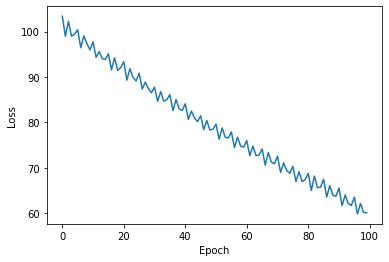

In [194]:
#Plotting the loss function
import matplotlib.pyplot as plt
#%matplotlib as inline
train_loss_list = [tl.item() for tl in train_losses]
plt.plot(range(epochs), train_loss_list)
plt.ylabel("Loss")
plt.xlabel("Epoch")

In [195]:
# Predictions in X_test_data
predictions = []
with torch.inference_mode():
  for data in X_test:
    y_prediction = model_0(data)
    predictions.append(y_prediction.argmax().item())

In [196]:
#Accuracy metric
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, predictions)
score

0.9269576125530488

### Using Xg-Boost Model

In [221]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier


model = XGBClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


[17:12:31] WARNING: /workspace/src/learner.cc:686: Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set tree_method to 'exact'.


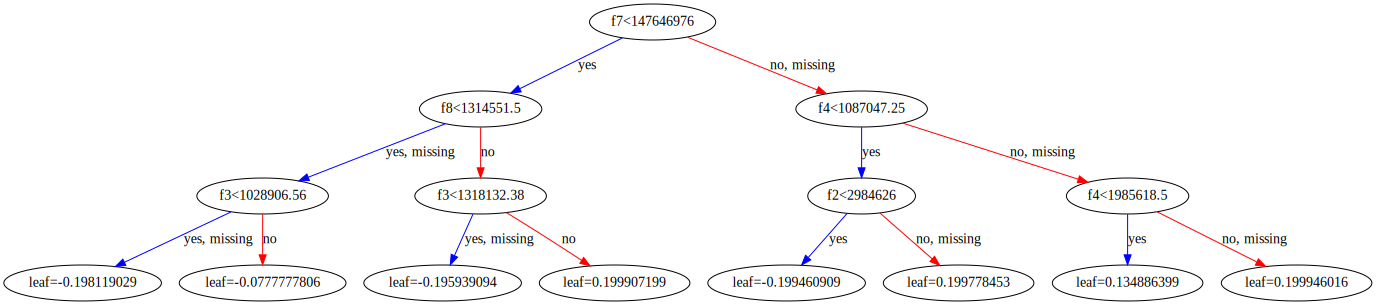

In [232]:
to_graphviz(model)

In [222]:
#Accuracy of xgBoost model
xgBoostScore = accuracy_score(y_test, y_pred)
xgBoostScore

0.9985446370145509



1.   There were no missing values in the dataset. Looking at the collinearity table we can drop isFlaggedFraud. If the transanction is 1 (Fraud) it is also Flagged.
2.   we select TRANSFER AND CASH_OUT type transanctions only because only these types of transanction involed Frauds. Other type becomes redundant. Then we label encode TRANSFER AND CASH_OUT to 0 and 1. We also drop nameOrig and nameDest. These are of type Object and have no effect on the outcomes.
3. The Dataset had an imbalance class problem, so we performed an oversampling technique called SMOTE and generated new minority class examples to balance
4. xgBoost Model shows better results than  Regression model
5. The Engineered feature is errorbalanceOrig is the most important. Shows the irregular activity with the difference in previous amount to the new amount with respect to the amount of transanction made
6. Using data science we can prevent transanctional frauds. We can detect unusual transactions or user behavior changes to automatically alert banks of the threat. 
7. To check that the model is working correctly, we show the model some data which it has never seen before, but which we know the fraud outcomes for. If the model detects the fraud correctly, we can deploy it to be used against the online business’s transactions. We also do some automatic common-sense analysis on recent data for which we do not have fraud labels to ensure the model will behave correctly when it is deployed.

